In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [3]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [4]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.995987963891675

In [5]:
# model tuning
rf= RandomForestClassifier()

In [6]:
rf_params = {"n_estimators": [100, 200, 500, 1000],
             "max_features": [3,10,25,48,70,100],
             "min_samples_split": [2,5,10,20,40,80]}

In [7]:
rf_cv_model = GridSearchCV(rf, rf_params, n_jobs =-1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [8]:
rf_cv_model.best_params_

{'max_features': 48, 'min_samples_split': 2, 'n_estimators': 500}

In [9]:
rf_tuned = RandomForestClassifier(max_features=48, min_samples_split=2,n_estimators=100).fit(X_train, y_train)

In [11]:
y_pred = rf_tuned.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.9989969909729187

In [17]:
rf_tuned.feature_importances_

array([2.07721461e-01, 1.17398077e-01, 0.00000000e+00, 1.14201576e-02,
       3.52347033e-01, 2.79471025e-01, 9.97216509e-04, 1.78960802e-03,
       5.04584266e-05, 3.45495005e-05, 4.81436942e-05, 0.00000000e+00,
       1.21440879e-04, 2.94576021e-04, 1.77428177e-04, 5.23488729e-05,
       1.16836086e-04, 8.39425427e-05, 1.01699966e-04, 6.22854853e-04,
       1.05574777e-03, 0.00000000e+00, 2.48496566e-04, 6.31244549e-05,
       2.26288469e-03, 7.40886577e-04, 1.64502578e-06, 3.96823961e-04,
       3.60756261e-04, 5.70818460e-05, 6.13227478e-05, 0.00000000e+00,
       5.45079779e-04, 0.00000000e+00, 2.74970577e-05, 2.73266362e-04,
       2.41067460e-04, 1.84898947e-04, 3.60735190e-04, 1.21059124e-05,
       9.98182371e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.20904366e-04, 0.00000000e+00,
       5.45953847e-05, 0.00000000e+00, 0.00000000e+00, 1.45492554e-04,
       2.04105526e-04, 1.02471273e-04, 8.98086068e-05, 1.09664800e-04,
      

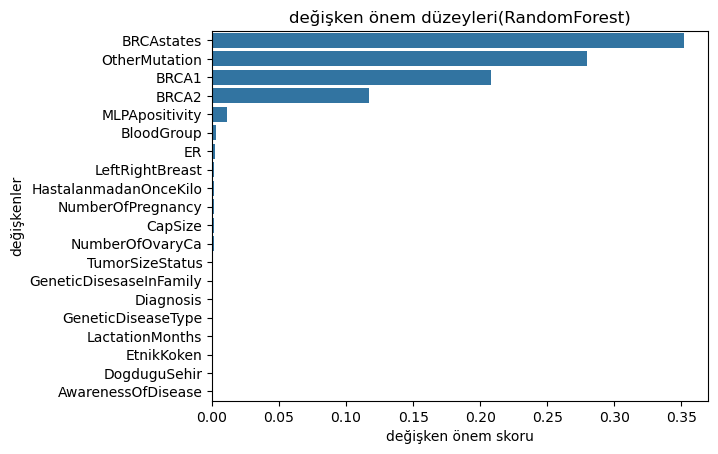

In [18]:
# değişken önem düzeyi belirleme
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri(RandomForest)")
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000  828.000000
1              0.985507  1.000000  0.992701   68.000000
2              1.000000  1.000000  1.000000   52.000000
3              0.000000  0.000000  0.000000    1.000000
4              1.000000  1.000000  1.000000   45.000000
5              1.000000  1.000000  1.000000    2.000000
6              1.000000  1.000000  1.000000    1.000000
accuracy       0.998997  0.998997  0.998997    0.998997
macro avg      0.855072  0.857143  0.856100  997.000000
weighted avg   0.998009  0.998997  0.998499  997.000000


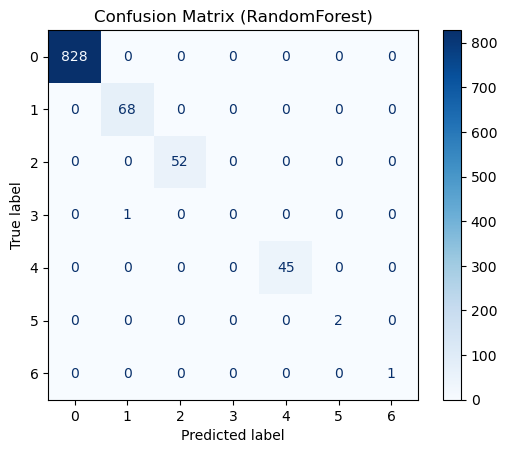

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (RandomForest)")
plt.savefig("confusion_matrix_display.png")
plt.show()

